In [1]:
from netCDF4 import Dataset
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely
import rioxarray
import pyproj
import pandas as pd

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
variable = "siconc"
print(variable)
model = "CESM2-WACCM"
print(model)
experiment = "ssp585"
print(experiment)
freq = "SImon"
print(freq)

siconc
CESM2-WACCM
ssp585
SImon


In [5]:
nc = Dataset("Data/Raw/siconc_SImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc")
unit = getattr(nc.variables[variable], "units")
print(unit)

%


In [6]:
nc = xarray.open_dataset("Data/Raw/siconc_SImon_NorESM2-MM_ssp585_r1i1p1f1_gn_201501-202012.nc")
nc

<xarray.Dataset>
Dimensions:             (time: 72, bnds: 2, j: 384, i: 360, vertices: 4)
Coordinates:
  * time                (time) object 2015-01-16 12:00:00 ... 2020-12-16 12:0...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 378 379 380 381 382 383 384
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 ...
    longitude           (j, i) float64 ...
    type                |S7 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object ...
    vertices_latitude   (j, i, vertices) float64 ...
    vertices_longitude  (j, i, vertices) float64 ...
    siconc              (time, j, i) float32 ...
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             Hybrid-restart from year 2015-01-01 of historical
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     60225.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               siconc
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/f82c029c-62f8-4166-963e-40de689a85b0

## Interpolation


In [6]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)

siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc
siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_210101-215012.nc
siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_215101-220012.nc
siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_220101-225012.nc
siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_225101-229912.nc


siconc_SImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc


In [7]:
# Finding max/min value between the two years
old = nct.open_data("Data/Raw/siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc")
old.subset(lon = [-180, 180], lat = [-90, 0])
old.to_nc("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'siconc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.


<xarray.Dataset>
Dimensions:    (time: 1032, bnds: 2, nj: 187, ni: 320, nvertices: 4)
Coordinates:
  * time       (time) object 2015-01-15 12:00:00 ... 2100-12-15 12:00:00
    lon        (nj, ni) float64 ...
    lat        (nj, ni) float64 ...
  * ni         (ni) float64 1.0 2.0 3.0 4.0 5.0 ... 317.0 318.0 319.0 320.0
  * nj         (nj) float64 1.0 2.0 3.0 4.0 5.0 ... 184.0 185.0 186.0 187.0
Dimensions without coordinates: bnds, nvertices
Data variables:
    time_bnds  (time, bnds) object ...
    lon_bnds   (nj, ni, nvertices) float64 ...
    lat_bnds   (nj, ni, nvertices) float64 ...
    siconc     (time, nj, ni) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 22:59:05 2022: cdo -L -z zip_9 -sellon...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    table_id:               SImon
    tracking_id:            hdl:21.14100/eae71066-bf12-4e97-a1a5-93f44aa88d64
    variable_id:            siconc
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

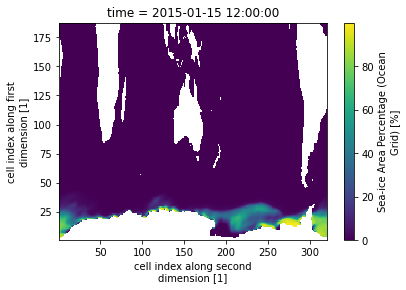

In [9]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = old.sel(time = "2015-01")
nc[variable].plot()
old

In [52]:
ds = nct.open_data("Data/Raw/siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc")
ds.to_latlon(lon = [-180, 180], lat = [-90, 90], res = [1, 1])
ds.to_nc("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment), overwrite=True)

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'siconc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'siconc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.


In [8]:
!cdo remapdis,r360x180 Data/Raw/siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

Warning (cdfInqContents): Coordinates variable time can't be assigned!
cdo    remapdis: Distance-weighted average weights from curvilinear (320x384) to lonlat (360x180) grid, with source mask (86096)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1032 timesteps [9.69s 217MB].


In [22]:
!ncremap -i Data/Raw/epc100_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc -d Data/epc100_CESM2-WACCM_ssp585_remapped.nc -o Trial.nc

Input #00: Data/Raw/epc100_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc
Grid(src): /tmp/ncremap_tmp_grd_src.nc.pid16211
Grid(dst): /tmp/ncremap_tmp_grd_dst.nc.pid16211
/usr/bin/ncremap: line 2425: 16246 Segmentation fault      (core dumped) ncks -O --dmm_in_mk --thr_nbr=2 --grd_src="/tmp/ncremap_tmp_grd_src.nc.pid16211" --grd_dst="/tmp/ncremap_tmp_grd_dst.nc.pid16211" --map="/tmp/ncremap_tmp_map_nco_nco_con.nc.pid16211" "/tmp/ncremap_tmp_dmm.nc.pid16211" "/tmp/ncremap_tmp_out.nc.pid16211" > /dev/null
ncremap: ERROR Failed to generate map-file. Debug this:
ncks -O --dmm_in_mk --thr_nbr=2 --grd_src="/tmp/ncremap_tmp_grd_src.nc.pid16211" --grd_dst="/tmp/ncremap_tmp_grd_dst.nc.pid16211" --map="/tmp/ncremap_tmp_map_nco_nco_con.nc.pid16211"  "/tmp/ncremap_tmp_dmm.nc.pid16211" "/tmp/ncremap_tmp_out.nc.pid16211" > /dev/null


In [8]:
!cdo remapdis,r360x180 Data/Raw/siconc_SImon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

Warning (cdfInqContents): Coordinates variable time can't be assigned!
cdo    remapdis: Distance-weighted average weights from curvilinear (320x384) to lonlat (360x180) grid, with source mask (86096)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1032 timesteps [9.62s 233MB].


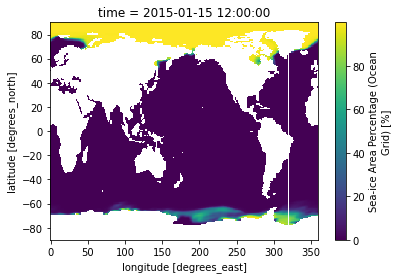

In [9]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [6]:
!cdo remapdis,r360x180 Data/Raw/siconc_SImon_NorESM2-MM_ssp585_r1i1p1f1_gn_201501-202012.nc Data/{variable}_NorESM2-MM_{experiment}_remapped.nc

cdo    remapdis: Distance-weighted average weights from curvilinear (360x384) to lonlat (360x180) grid, with source mask (86518)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 72 timesteps [1.07s 224MB].


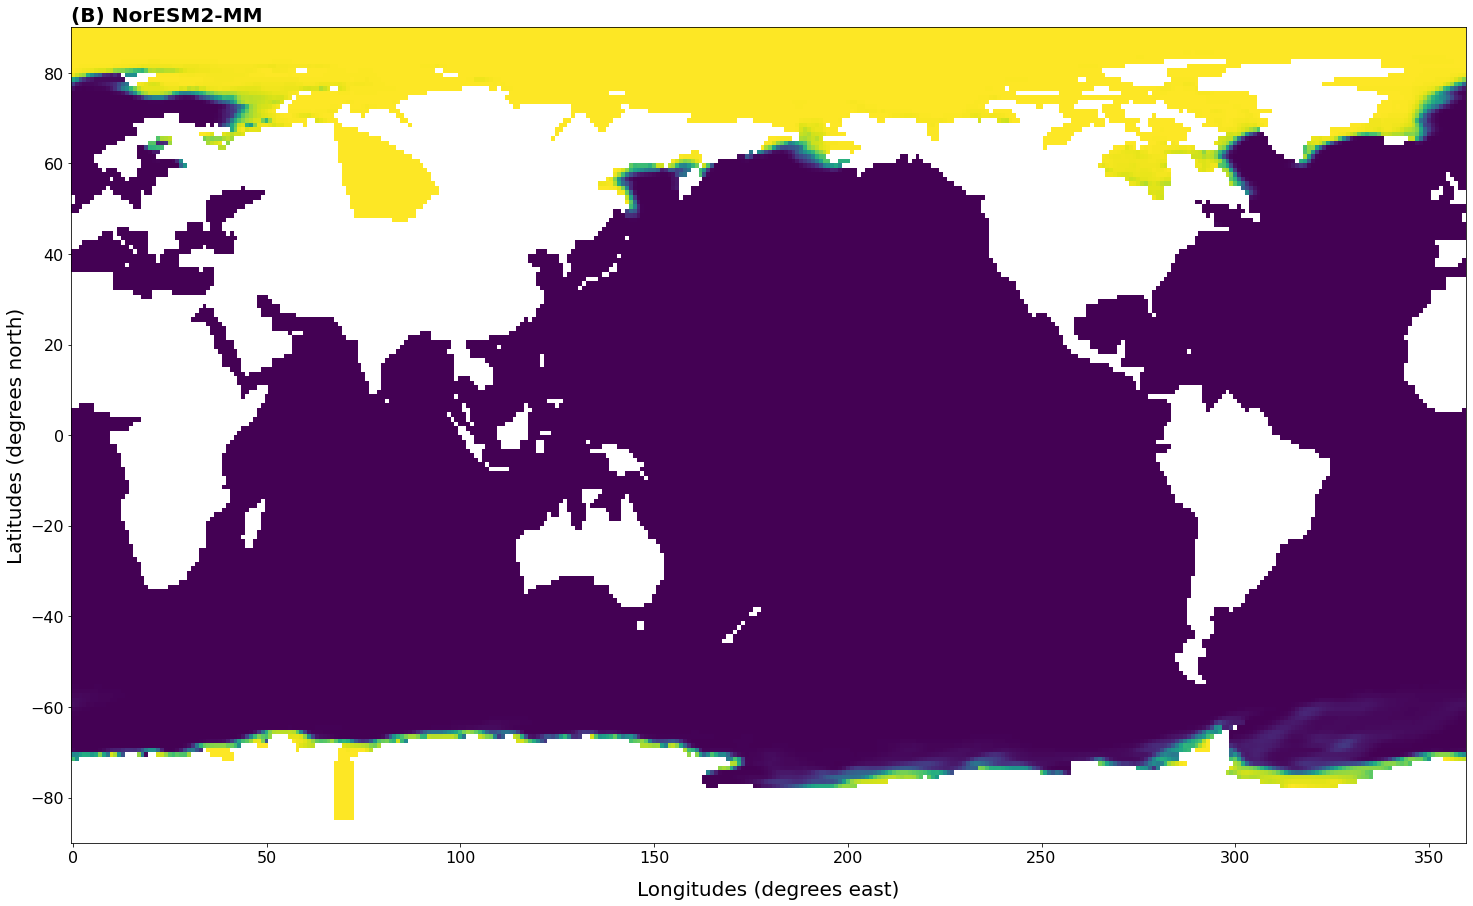

In [15]:
nc = xarray.open_dataset("Data/{}_NorESM2-MM_{}_remapped.nc".format(variable, experiment))
nc = nc.sel(time = "2015-01")

fig, axes = plt.subplots(figsize=(25,15))
plot = nc[variable].plot(ax=axes, add_colorbar = False, add_labels = False)

plt.title("(B) NorESM2-MM", fontsize = 20, fontweight = "bold", loc = "left")
plt.ylabel("Latitudes (degrees north)", fontsize = 20)
plt.xlabel("Longitudes (degrees east)", fontsize = 20, labelpad = 15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("output/{}/{}_NorESM2-MM_{}_interpolation.png".format(model, variable, experiment))

plt.show()

In [12]:
!cdo remapdis,r360x180 Data/Raw/siconc_SImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

Warning (cdfInqContents): Coordinates variable time can't be assigned!
cdo    remapdis: Distance-weighted average weights from curvilinear (320x384) to lonlat (360x180) grid, with source mask (86096)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1980 timesteps [23.04s 274MB].


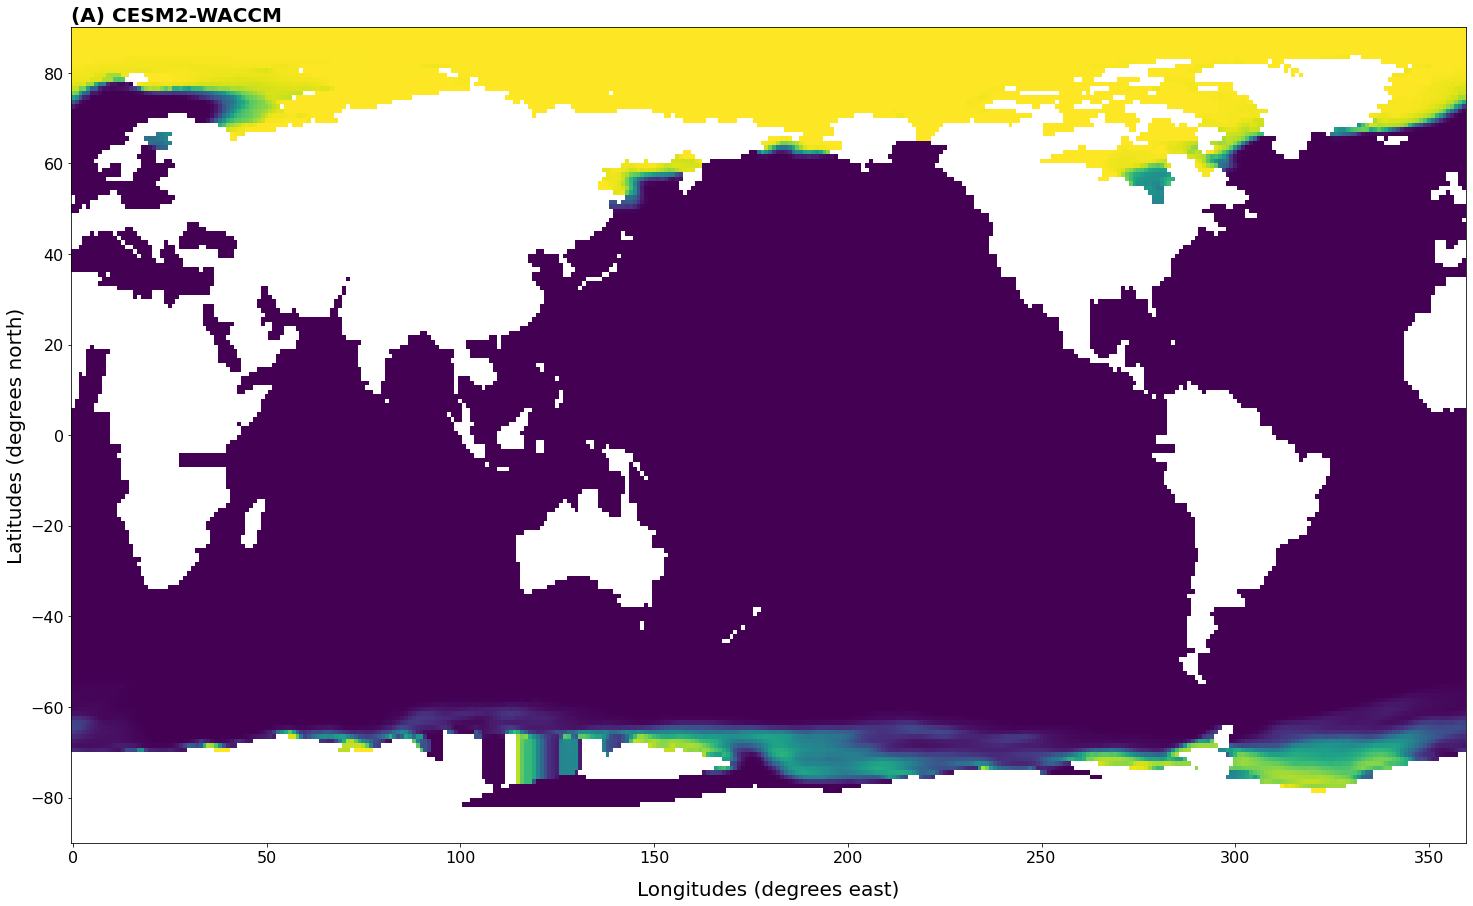

In [14]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")

fig, axes = plt.subplots(figsize=(25,15))
plot = nc[variable].plot(ax=axes, add_colorbar = False, add_labels = False)

plt.title("(A) {}".format(model), fontsize = 20, fontweight = "bold", loc = "left")
plt.ylabel("Latitudes (degrees north)", fontsize = 20)
plt.xlabel("Longitudes (degrees east)", fontsize = 20, labelpad = 15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("output/{}/{}_{}_{}_interpolation.png".format(model, variable, model, experiment))

plt.show()

## Sea ice selection

#### Selecting mask region

In [7]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(lat=slice(-90,0))
nc

FileNotFoundError: [Errno 2] No such file or directory: b'/media/jasmine/Album/Project/Data/siconc_CESM2-WACCM_historical_remapped.nc'

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'siconc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.


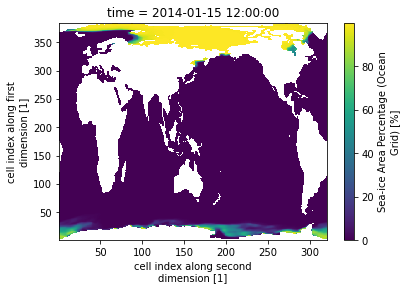

In [19]:
nc = xarray.open_dataset("Data/Raw/siconc_SImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc")
nc = nc.sel(time = "2014-01")
nc[variable].plot()
#nc

In [8]:
nc = xarray.open_dataset("Data/Raw/siconc_SImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc")
nc
nc = nc.sel(nj=slice(0,200))
#nc

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'siconc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.


In [22]:
nc.

AttributeError: 'Dataset' object has no attribute 'crs'

In [ ]:
cc = pyproj.CRS.from_cf(

In [9]:
# Selecting the last 20 years of historical
#nc = nc.drop_vars("time_bnds")
history = nc.sel(time=slice('1995-01', '2014-12'))
history

<xarray.Dataset>
Dimensions:    (time: 240, nj: 200, ni: 320, d2: 2, nvertices: 4)
Coordinates:
    lat        (nj, ni) float64 ...
    lon        (nj, ni) float64 ...
  * ni         (ni) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * nj         (nj) int32 1 2 3 4 5 6 7 8 9 ... 193 194 195 196 197 198 199 200
  * time       (time) object 1995-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: d2, nvertices
Data variables:
    siconc     (time, nj, ni) float32 ...
    time_bnds  (time, d2) object ...
    lat_bnds   (nj, ni, nvertices) float32 ...
    lon_bnds   (nj, ni, nvertices) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                4
    cesm_casename:          b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-31T00:04:12Z
    ...                     ...
    variable_id:            siconc
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    branch_time_in_parent:  20075.0
    branch_time_in_child:   674885.0
    branch_method:          standard

In [10]:
# Finding yearly max ice cover 
yearly_max = history.groupby("time.year").max("time")
yearly_max

<xarray.Dataset>
Dimensions:    (year: 20, nj: 200, ni: 320, d2: 2, nvertices: 4)
Coordinates:
    lat        (nj, ni) float64 -79.22 -79.22 -79.22 ... 3.318 3.318 3.318
    lon        (nj, ni) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
  * ni         (ni) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * nj         (nj) int32 1 2 3 4 5 6 7 8 9 ... 193 194 195 196 197 198 199 200
  * year       (year) int64 1995 1996 1997 1998 1999 ... 2011 2012 2013 2014
Dimensions without coordinates: d2, nvertices
Data variables:
    siconc     (year, nj, ni) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    time_bnds  (year, d2) object 1995-12-01 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (year, nj, ni, nvertices) float32 -79.49 -79.49 ... 3.449 3.449
    lon_bnds   (year, nj, ni, nvertices) float32 320.0 321.1 ... 320.0 318.9

In [11]:
# Calculating mean over 20 years
mean = yearly_max.mean(dim = "year")
mean

<xarray.Dataset>
Dimensions:   (nj: 200, ni: 320, nvertices: 4)
Coordinates:
    lat       (nj, ni) float64 -79.22 -79.22 -79.22 -79.22 ... 3.318 3.318 3.318
    lon       (nj, ni) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
  * ni        (ni) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
  * nj        (nj) int32 1 2 3 4 5 6 7 8 9 ... 193 194 195 196 197 198 199 200
Dimensions without coordinates: nvertices
Data variables:
    siconc    (nj, ni) float32 nan nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    lat_bnds  (nj, ni, nvertices) float32 -79.49 -79.49 -78.95 ... 3.449 3.449
    lon_bnds  (nj, ni, nvertices) float32 320.0 321.1 321.1 ... 320.0 318.9

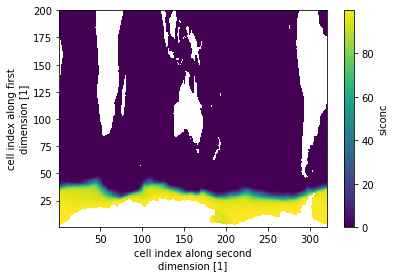

In [12]:
mean[variable].plot()

In [13]:
mean.to_netcdf(path = "Data/{}_{}_ice_extent.nc".format(variable, model), mode = "w", format = "NETCDF4")

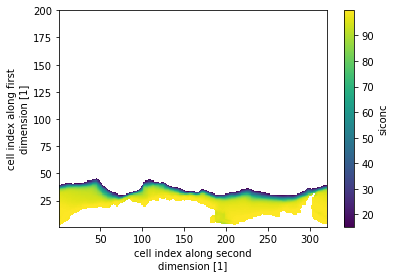

In [14]:
# Select cells with >15% ice cover
ice = mean.where(mean >= 15)
ice[variable].plot()

In [15]:
ice = ice.assign(ice = lambda x: getattr(x, variable) - getattr(x, variable) + 1)

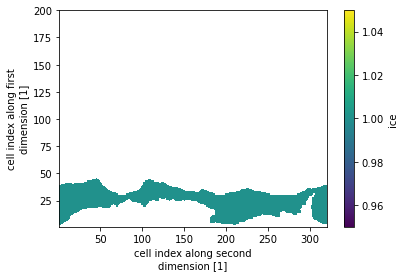

In [16]:
ice['ice'].plot()

In [17]:
ice = ice.drop_vars("siconc")
ice.to_netcdf(path = "Data/Shape/{}_{}_ice_region.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [17]:
!cdo remapdis,r360x180 Data/Shape/{variable}_{model}_ice_region.nc Data/Shape/{variable}_{model}_ice_region_remapped.nc

Warning (cdf_set_var): Inconsistent variable definition for lat_bnds!
Warning (cdf_set_var): Inconsistent variable definition for lon_bnds!
cdo    remapdis: Distance-weighted average weights from curvilinear (320x200) to lonlat (360x180) grid, with source mask (6389)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1 timestep [1.64s 354MB].


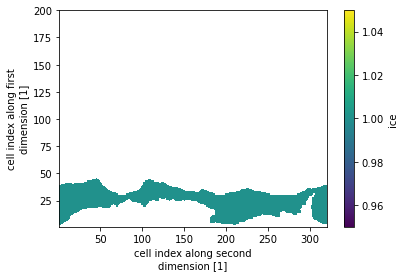

In [19]:
nc = xarray.open_dataset("Data/Shape/{}_{}_ice_region.nc".format(variable, model))
nc['ice'].plot()

### Making mask

In [9]:
shape = gpd.read_file("Shapes/{}_ice_margin.shp".format(model), crs = "EPSG:4326")
shape

,fid,DN,geometry
0,1.0,0,"POLYGON ((4.50000 -56.00000, 13.50000 -56.0000..."


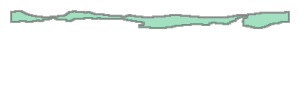

In [10]:
coord1 = shape['geometry'][0].exterior.coords
line1 = shp.LinearRing(coord1)
poly1 = shp.Polygon(line1)
poly1

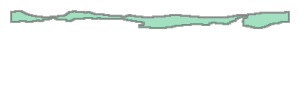

In [11]:
multi_poly = shp.MultiPolygon([poly1])
multi_poly

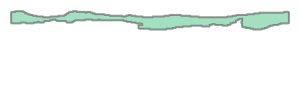

In [12]:
# Expand the region by 1 cells to include open sea
expand = shp.Polygon(multi_poly.buffer(1.0))
expand

In [13]:
ice_new = gpd.GeoSeries(expand)
ice_new

0    POLYGON ((3.500 -56.000, 3.505 -55.902, 3.519 ...
dtype: geometry

In [10]:
ice_new.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_extended_ice_margin.shp".format(model))

In [14]:
ice_new.crs = {'init' :'epsg:4326'}

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<AxesSubplot:>

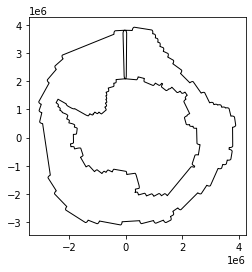

In [16]:
df_ae = ice_new.to_crs("epsg:3031")
df_ae.plot(facecolor="none", edgecolor="black")

In [17]:
df_ae.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_ice_margin_remapped.shp".format(model))

In [14]:
shape = gpd.read_file("Shapes/{}_ice_margin_og.shp".format(model))
shape

,DN,geometry
0,1,"POLYGON ((44.000 155.000, 44.000 156.000, 39.0..."


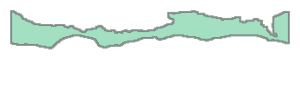

In [15]:
coord1 = shape['geometry'][0].exterior.coords
line1 = shp.LinearRing(coord1)
poly1 = shp.Polygon(line1)
poly1

In [16]:
print(poly1)

POLYGON ((44 155, 44 156, 39 156, 39 157, 33 157, 33 158, 30 158, 30 159, 18 159, 18 160, 16 160, 16 159, 7 159, 7 160, 2 160, 2 161, 0 161, 0 198, 3 198, 3 197, 5 197, 5 196, 6 196, 6 195, 9 195, 9 194, 11 194, 11 193, 12 193, 12 192, 13 192, 13 190, 14 190, 14 189, 17 189, 17 188, 18 188, 18 187, 21 187, 21 186, 24 186, 24 185, 25 185, 25 184, 27 184, 27 183, 33 183, 33 182, 47 182, 47 181, 51 181, 51 182, 61 182, 61 181, 62 181, 62 180, 65 180, 65 179, 66 179, 66 180, 68 180, 68 181, 71 181, 71 180, 72 180, 72 179, 73 179, 73 178, 76 178, 76 177, 79 177, 79 176, 80 176, 80 175, 82 175, 82 174, 85 174, 85 175, 86 175, 86 176, 87 176, 87 177, 93 177, 93 178, 98 178, 98 180, 101 180, 101 181, 104 181, 104 180, 105 180, 105 179, 106 179, 106 178, 108 178, 108 176, 111 176, 111 175, 115 175, 115 176, 119 176, 119 175, 120 175, 120 173, 122 173, 122 174, 127 174, 127 173, 128 173, 128 175, 131 175, 131 176, 133 176, 133 175, 135 175, 135 174, 137 174, 137 175, 139 175, 139 176, 147 176, 1

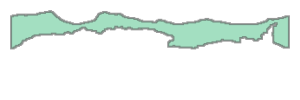

In [19]:
P = shapely.affinity.scale(poly1, yfact=-1, origin=(0,1))
P

In [20]:
print(P)

POLYGON ((44 -153, 44 -154, 39 -154, 39 -155, 33 -155, 33 -156, 30 -156, 30 -157, 18 -157, 18 -158, 16 -158, 16 -157, 7 -157, 7 -158, 2 -158, 2 -159, 0 -159, 0 -196, 3 -196, 3 -195, 5 -195, 5 -194, 6 -194, 6 -193, 9 -193, 9 -192, 11 -192, 11 -191, 12 -191, 12 -190, 13 -190, 13 -188, 14 -188, 14 -187, 17 -187, 17 -186, 18 -186, 18 -185, 21 -185, 21 -184, 24 -184, 24 -183, 25 -183, 25 -182, 27 -182, 27 -181, 33 -181, 33 -180, 47 -180, 47 -179, 51 -179, 51 -180, 61 -180, 61 -179, 62 -179, 62 -178, 65 -178, 65 -177, 66 -177, 66 -178, 68 -178, 68 -179, 71 -179, 71 -178, 72 -178, 72 -177, 73 -177, 73 -176, 76 -176, 76 -175, 79 -175, 79 -174, 80 -174, 80 -173, 82 -173, 82 -172, 85 -172, 85 -173, 86 -173, 86 -174, 87 -174, 87 -175, 93 -175, 93 -176, 98 -176, 98 -178, 101 -178, 101 -179, 104 -179, 104 -178, 105 -178, 105 -177, 106 -177, 106 -176, 108 -176, 108 -174, 111 -174, 111 -173, 115 -173, 115 -174, 119 -174, 119 -173, 120 -173, 120 -171, 122 -171, 122 -172, 127 -172, 127 -171, 128 -171, 

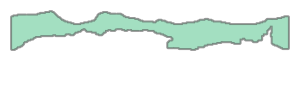

In [21]:
# Expand the region by 1 cells to include open sea
expand = shp.Polygon(P.buffer(1.0))
expand

In [22]:
ice_new = gpd.GeoSeries(expand)
ice_new

0    POLYGON ((44.000 -152.000, 46.000 -152.000, 46...
dtype: geometry

In [23]:
ice_new.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_extended_ice_margin_og.shp".format(model))